<a href="https://colab.research.google.com/github/ericakitano/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**



- **Author:** Erica Kitano

## **Project Overview**


## **Load and Inspect Data**


### Load Data

In [505]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [506]:
import pandas as pd

In [507]:
filename = '/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Project/sales_predictions.csv'
df = pd.read_csv(filename)

### Inspect Data

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [509]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Clean Data**


In [510]:
# Find the number of rows and columns:
df.shape


(8523, 12)

The dataframe has 8523 rows and 12 columns.

In [511]:
# Find the datatypes of each variable:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Duplicates

In [512]:
#Find duplicates and drop.

df.duplicated().sum()

0

There are no duplicates.

### Missing Values

In [513]:
#Identify missing values.

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The ```Item_Weight``` column and ```Outlet_Size``` column contains rows with missing values.

In [514]:
#Fill in the missing values.

# Fill in the blanks with the median value for "Item_Weight"
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)

# Fill in the blanks with the word "Unknown" for "Outlet_Size".
df['Outlet_Size'].fillna('Unknown', inplace=True)

Justification: 

- [Item_Weight]: There are 1463 rows that are missing the "Item_Weight" values. That is too many rows to drop from the dataset because it is **more than 5%** of the total rows: 8523. I will fill it in with the median 'Item_Weight' **because `median` is less affected by outlier than `mean`.**
- [Outlet_Size]: There are 2410 rows that are missing the "Outlet_Size" values. That is too many rows to drop from the dataset because it is **more than 5%** of the total rows: 8523. I will fill it in with the word "Unknown" for now **because it is a categorical data, and we cannot use `mean`, `median`, or `mode` for this column.**



In [515]:
#Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Inconsistent Values

In [516]:
#Find and fix any inconsistent categories of data so that they are consistent.

#Output below for visibility of the different values under Item_Type to see if there are any inconsistencies:
df.groupby('Item_Type')['Item_Visibility'].mean()


Item_Type
Baking Goods             0.069169
Breads                   0.066255
Breakfast                0.085723
Canned                   0.068129
Dairy                    0.072427
Frozen Foods             0.065645
Fruits and Vegetables    0.068513
Hard Drinks              0.064943
Health and Hygiene       0.055216
Household                0.061322
Meat                     0.062284
Others                   0.060241
Seafood                  0.074976
Snack Foods              0.066850
Soft Drinks              0.063972
Starchy Foods            0.067564
Name: Item_Visibility, dtype: float64

There are no inconsistencies found in this column.

In [517]:
#Check for inconsistent values continued: 
#Output below for visibility of the different values under Item_Fat_Content to see if there are any inconsistencies:
df.groupby('Item_Fat_Content')['Item_Visibility'].mean()

Item_Fat_Content
LF         0.066628
Low Fat    0.064166
Regular    0.069564
low fat    0.065300
reg        0.066361
Name: Item_Visibility, dtype: float64

There are some inconsistences found in this column.

In [518]:
#Fix the inconsistences.
df.replace({'LF' : 'Low Fat', 
            'low fat' : 'Low Fat',
            'reg' : 'Regular'}, inplace=True)

In [519]:
#Check that there are no more inconsistencies:
df.groupby('Item_Fat_Content')['Item_Visibility'].mean()

Item_Fat_Content
Low Fat    0.064330
Regular    0.069439
Name: Item_Visibility, dtype: float64

In [ ]:
#Loop through categorical columns for a final inspection (to check for inconsistant values).
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols
for col in str_cols:
    print(f"Column: {col}")
    #pd.set_option('display.max_rows', None)
    print(df[col].value_counts(dropna=False))
    print('\n\n')

All inconsistent values have been addressed.

### Odd Values

In [521]:
#Obtain the summary statistics of each (min, max, mean) for numerical columns

In [522]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


There are no odd values found in the numerical columns.

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Exploratory Data Analysis**

In [524]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [525]:
#display each column name and its datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### **Univariate Exploratory Visualization**

> #### Numerical Columns
> * Item_Weight
> * Item_Visibility
> * Item_MRP
> * Outlet_Establishment_Year
> * Item_Outlet_Sales







In [526]:
#statistically analyze the numerical columns
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


##### **`Item_Weight`**

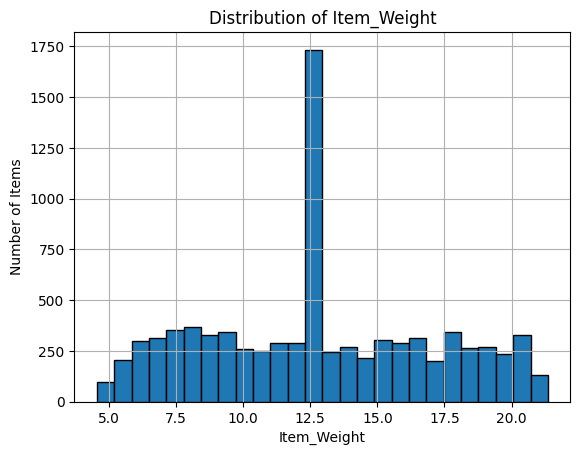

In [527]:
#Distribution of Item_Weight
ax = df['Item_Weight'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Item_Weight')
ax.set_xlabel('Item_Weight')
ax.set_ylabel('Number of Items');

**Interpretation:** 

Since I used **median** (`df['Item_Weight'].median()`) to fill in all of the rows that were missing the Item_Weight, I see a peak at the median value. 

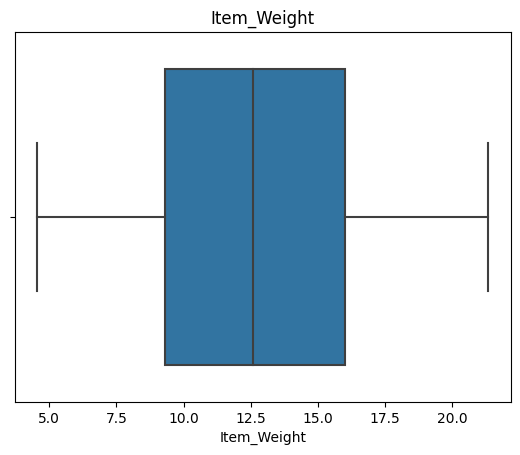

In [528]:
# Boxplot of Item_Weight
ax = sns.boxplot(x='Item_Weight', data=df)
ax.set_title("Item_Weight");

**Interpretation**: There are no outliers, and the data is not skewed.

##### **`Item_Visibility`**

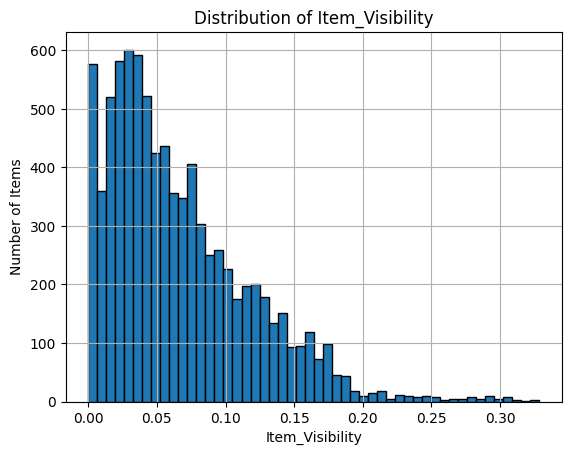

In [529]:
#Distribution of Item_Visibility
ax = df['Item_Visibility'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Item_Visibility')
ax.set_xlabel('Item_Visibility')
ax.set_ylabel('Number of Items');

**Interpretation**:

The data is skewed to the high side.

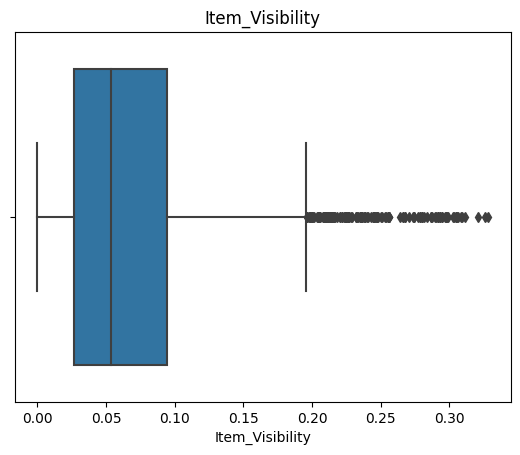

In [530]:
# Boxplot of Item_Visibility
ax = sns.boxplot(x='Item_Visibility', data=df)
ax.set_title("Item_Visibility");

**Interpretation**: There are many outliers on the high side.

##### **`Item_MRP`**

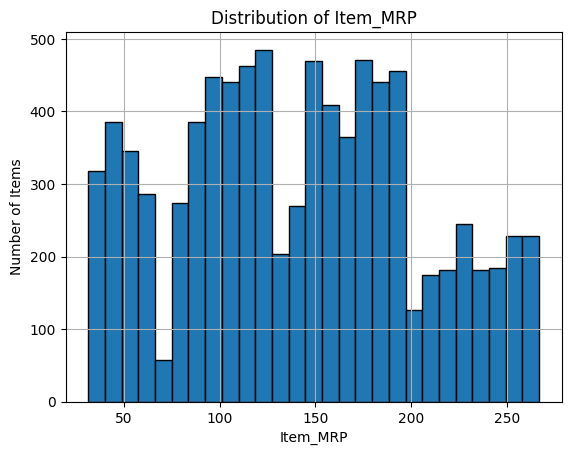

In [531]:
#Distribution of Item_MRP
ax = df['Item_MRP'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Item_MRP')
ax.set_xlabel('Item_MRP')
ax.set_ylabel('Number of Items');

**Interpretation**:

There are fewer items with higher MRP.

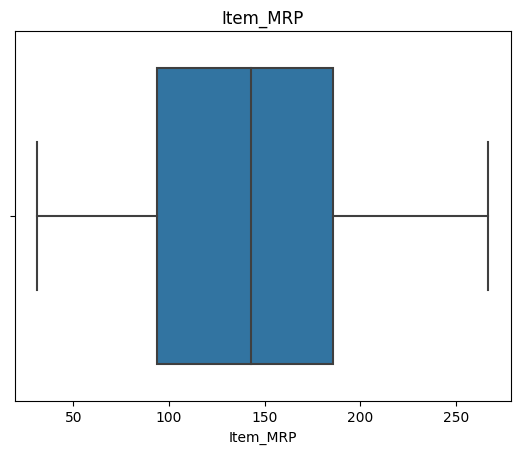

In [532]:
# Boxplot of Item_MRP
ax = sns.boxplot(x='Item_MRP', data=df)
ax.set_title("Item_MRP");

**Interpretation**: There are no outliers, and the data does not show a large skew.

##### **`Outlet_Establishment_Year`**

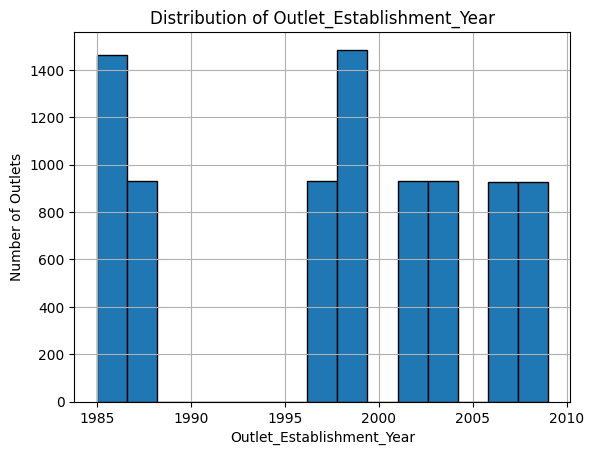

In [533]:
#Distribution of Outlet_Establishment_Year
ax = df['Outlet_Establishment_Year'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Outlet_Establishment_Year')
ax.set_xlabel('Outlet_Establishment_Year')
ax.set_ylabel('Number of Outlets');

**Interpretation**:

There is a gap for Outlet Establishment between late 1980s and mid 1990s.

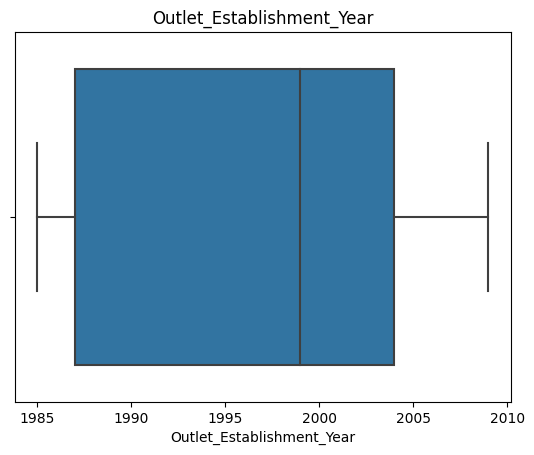

In [534]:
# Boxplot of Outlet_Establishment_Year
ax = sns.boxplot(x='Outlet_Establishment_Year', data=df)
ax.set_title("Outlet_Establishment_Year");

**Interpretation**: There are no outliers, but the data is slightly skewed.

##### **`Item_Outlet_Sales`**

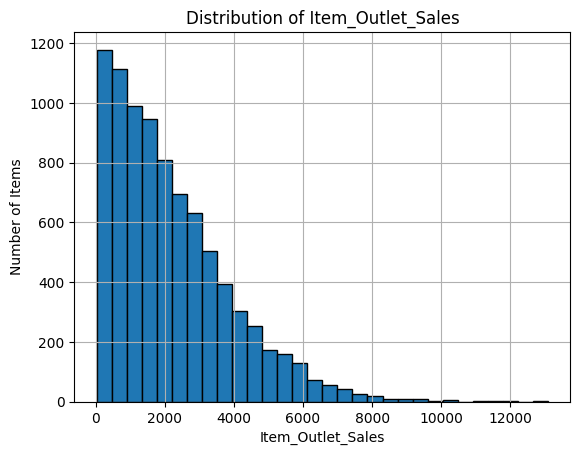

In [535]:
#Distribution of Item_Outlet_Sales
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.set_title('Distribution of Item_Outlet_Sales')
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Number of Items');

**Interpretation**: 

The data is skewed to the positive side.

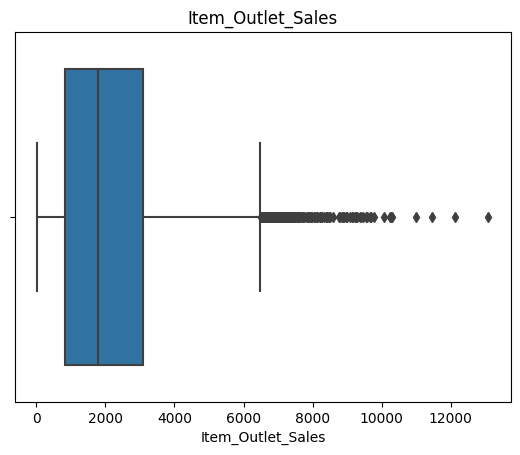

In [536]:
# Boxplot of Item_Outlet_Sales
ax = sns.boxplot(x='Item_Outlet_Sales', data=df)
ax.set_title("Item_Outlet_Sales");

**Interpretation**: There are many outliers on the high side. The data is skewed to the positive side.

> #### Categorical Columns
> * Item_Identifier
> * Item_Fat_Content
> * Item_Type
> * Outlet_Identifier
> * Outlet_Size 
> * Outlet_Location_Type
> * Outlet_Type    

In [537]:
#statistically analyze the categorical columns
df.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


##### **`Item_Fat_Content`**

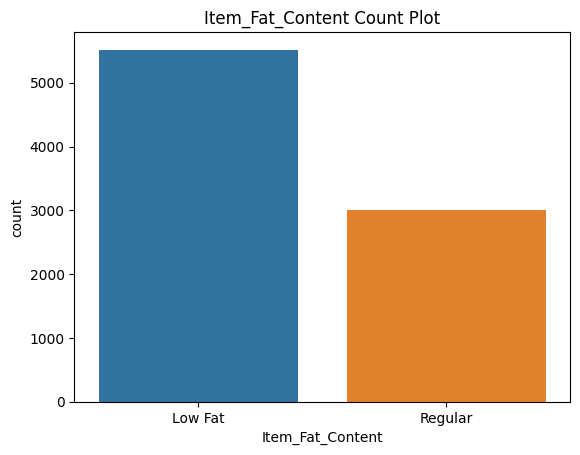

In [538]:
#Count plot of Item_Fat_Content
ax = sns.countplot(data=df, x='Item_Fat_Content')
#Set title
ax.set_title("Item_Fat_Content Count Plot");

**Interpretation**: There are more Low Fat items compared to Regular Fat items.



##### **`Item_Type`**

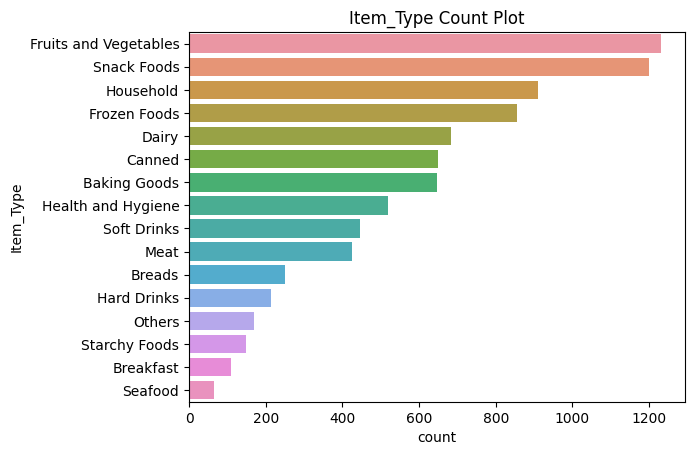

In [539]:
#Count plot of Item_Type

#Define the label order so that the value with most counts appear at the top of the horizontal graph.
label_order = df['Item_Type'].value_counts().index

#Count plot of Item_Type
ax = sns.countplot(data=df, y='Item_Type', order=label_order)

#Set title
ax.set_title("Item_Type Count Plot");

**Interpretation**: Fruits and Vegetables, and Snack Foods have high count.

##### **`Outlet_Identifier`**

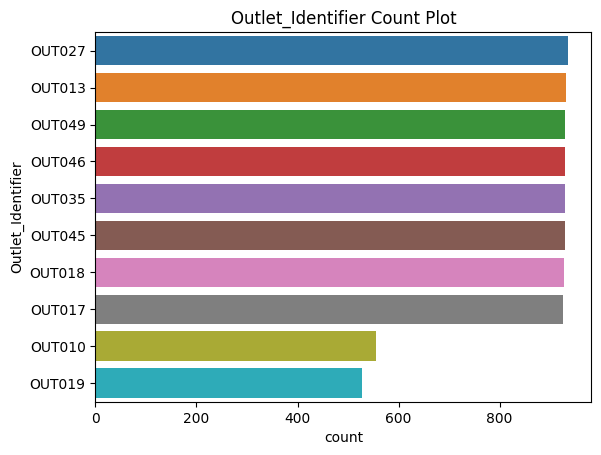

In [540]:
#Count plot of Outlet_Identifier

#Define the label order so that the value with most counts appear at the top of the horizontal graph.
label_order = df['Outlet_Identifier'].value_counts().index

#Count plot of Outlet_Identifier
ax = sns.countplot(data=df, y='Outlet_Identifier', order=label_order)

#Set title
ax.set_title("Outlet_Identifier Count Plot");

**Interpretation**: The data is from 10 different outlets and 8 of those outlets contribute about equal amount of data.

##### **`Outlet_Size`**

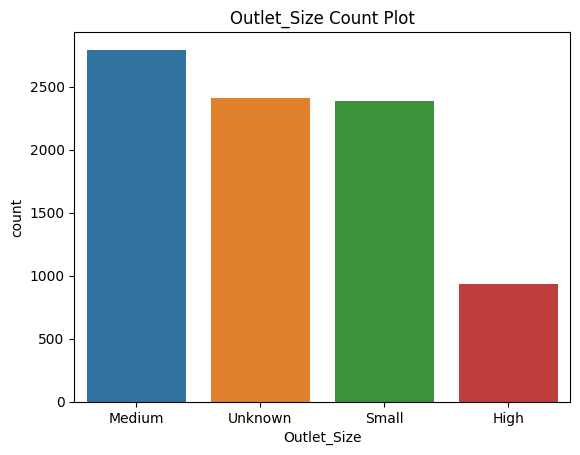

In [541]:
#Count plot of Outlet_Size

#Define the label order so that the graph is in decreasing order.
label_order = df['Outlet_Size'].value_counts().index

#Count plot of Outlet_Size
ax = sns.countplot(data=df, x='Outlet_Size', order=label_order)

#Set title
ax.set_title("Outlet_Size Count Plot");

**Interpretation**: We filled many rows with the value: "Unknown".

##### **`Outlet_Location_Type`**

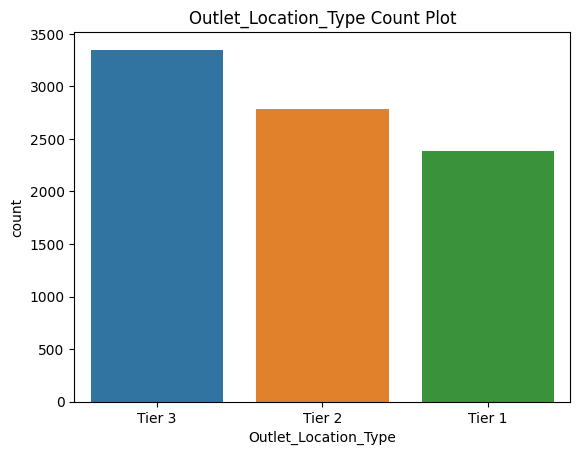

In [542]:
#Count plot of Outlet_Location_Type

#Define the label order so that the graph is in decreasing order.
label_order = df['Outlet_Location_Type'].value_counts().index

#Count plot of Outlet_Size
ax = sns.countplot(data=df, x='Outlet_Location_Type', order=label_order)

#Set title
ax.set_title("Outlet_Location_Type Count Plot");

**Interpretation**: Tier 3 Location has the highest count, then Tier 2, then Tier 1.

##### **`Outlet_Type`**

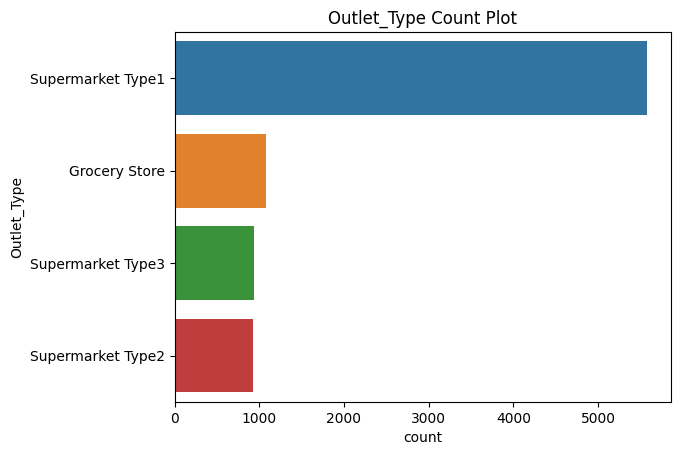

In [543]:
#Count plot of Outlet_Type

#Define the label order.
label_order = df['Outlet_Type'].value_counts().index

#Count plot of Outlet_Size
ax = sns.countplot(data=df, y='Outlet_Type', order=label_order)

#Set title
ax.set_title("Outlet_Type Count Plot");

**Interpretation**: Supermarket Type1 has the highest count and is nearly 5 times more than any of the other outlet types.

### **Multivariate Exploratory Visualization**

#### **Boxplot**

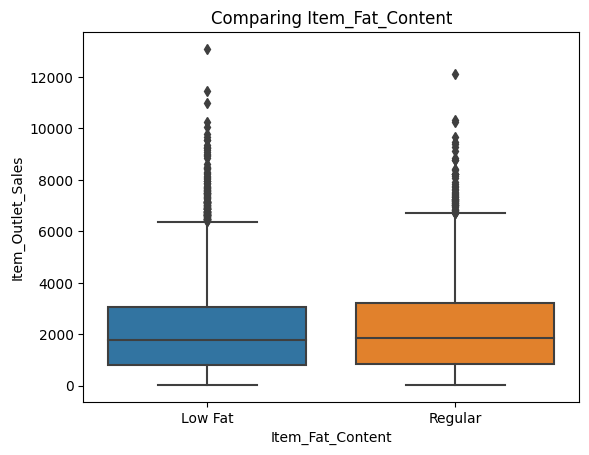

In [544]:
# Boxplot of Item_Outlet_Sales against Item_Fat_Content.
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Item_Fat_Content");

**Interpretation**: There is not a significant difference in the `Item_Outlet_Sales` depending on the `Item_Fat_Content`.

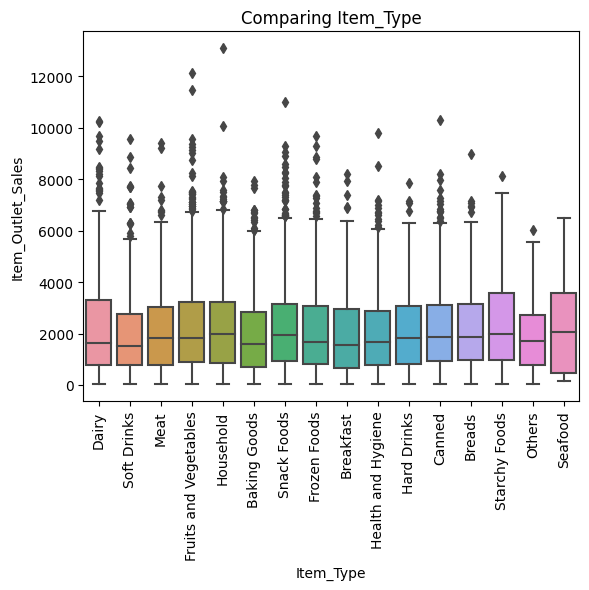

In [545]:
# Boxplot of Item_Outlet_Sales against Item_Type.
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_Type");

**Interpretation**: `Item_Type`: "Household" has the highest outlier in terms of `Item_Outlet_Sales`.

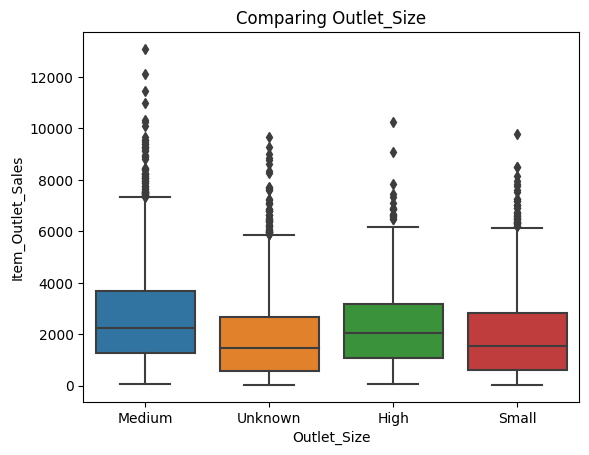

In [546]:
# Boxplot of Item_Outlet_Sales against Outlet_Size.
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet_Size");

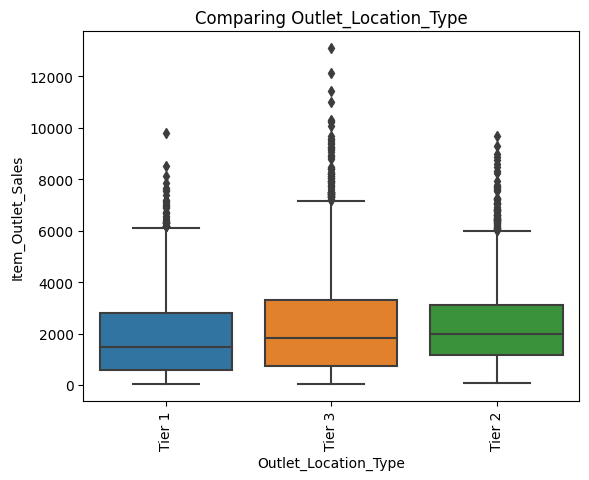

In [547]:
# Boxplot of Item_Outlet_Sales against Outlet_Location_Type.
ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Outlet_Location_Type");

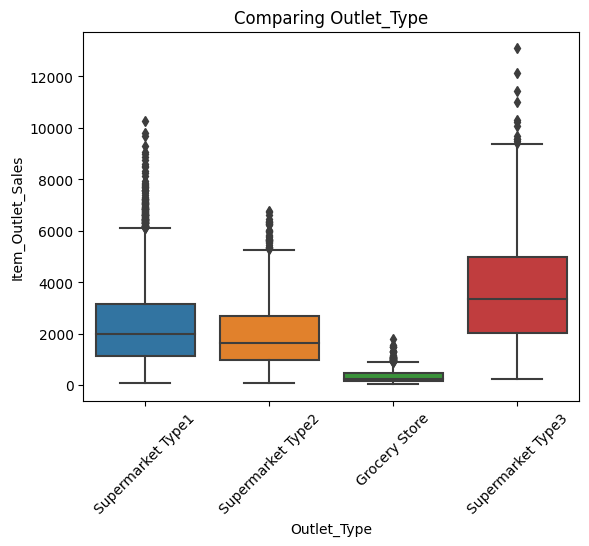

In [548]:
# Boxplot of Item_Outlet_Sales against Item_Type.
ax = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Comparing Outlet_Type");

**Interpretation**: Grocery Store does not have high `Item_Outlet_Sales` overall.

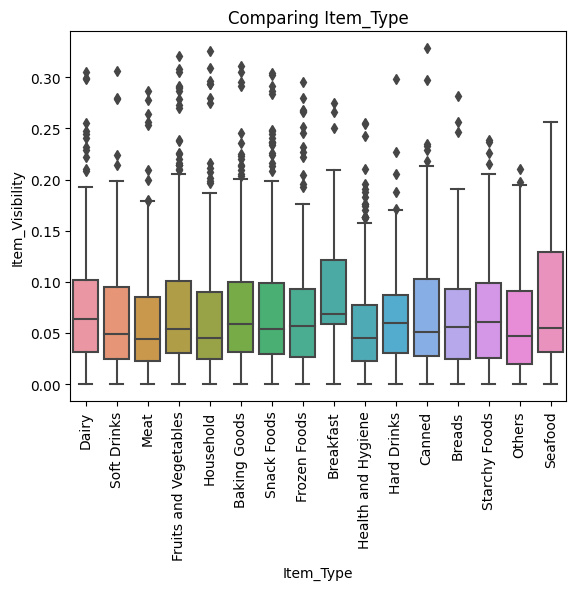

In [549]:
# Boxplot of Item_Visibility against Item_Type.
ax = sns.boxplot(x='Item_Type', y='Item_Visibility', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_Type");

**Interpretation**: `Item_Type`: "Breakfast" tends to have higher visibility compared to products of other `Item_Type`.

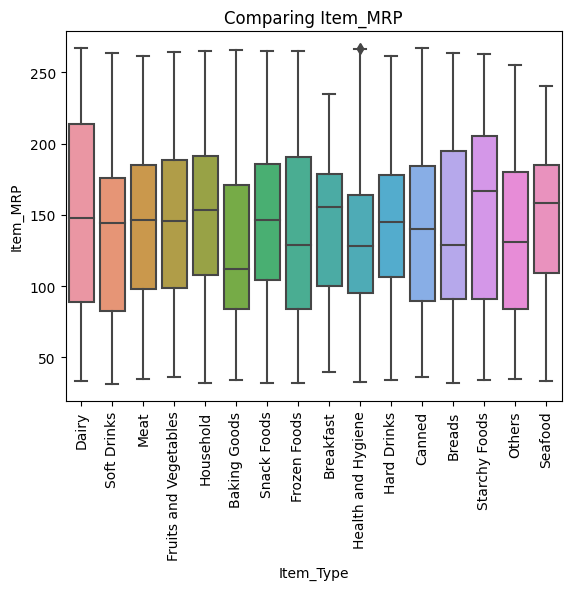

In [550]:
# Boxplot of Item_Type against Item_MRP.
ax = sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_MRP");

**Interpretation**: `The median `Item_MRP` is lowest for `Baking Goods` and highest for `Starchy Foods`.

#### **Heatmap**

In order to predict `Item_Outlet_Sales`, we need to see which features are correlated with `Item_Outlet_Sales` so that they can be used to predict `Item_Outlet_Sales`. I will use **Heatmap** to see the correlation between features.

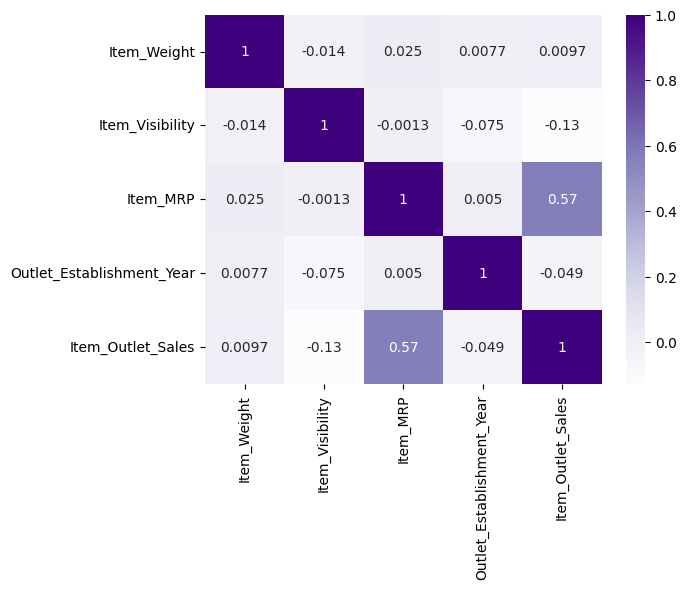

In [551]:
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);

There is a moderate positive correlation between `Item_MRP` and `Item_Outlet_Sales`.

## **Explanatory Data Analysis**

#### **Annotated Histogram**

In [552]:
## Create a function to plot an annotated histogram with mean and median
def plot_annotated_histogram(df, col):
    ## Saving the mean and median of the column
    mean = df[col].mean().round(2)
    median = df[col].median().round(2)
    ## Create a plot with style "bmh" 
    with plt.style.context('bmh'):
      ## Creating the Plot
      fig,ax = plt.subplots(figsize=(10,6))
      sns.histplot(data=df, x=col, ax=ax, edgecolor = 'black')
      ax.set_title(col)
      ax.grid(c = 'grey', 
         alpha = .9,
         linestyle = '-')
    ## Annotating measures of centrality
    ax.axvline(mean, color='red',label=f'Mean: {mean}', lw=2);
    ax.axvline(median, color = 'orange',  label = f'Median: {median}', lw=2)
    
    ax.legend();
    return fig, ax

##### **`Item_MRP`**

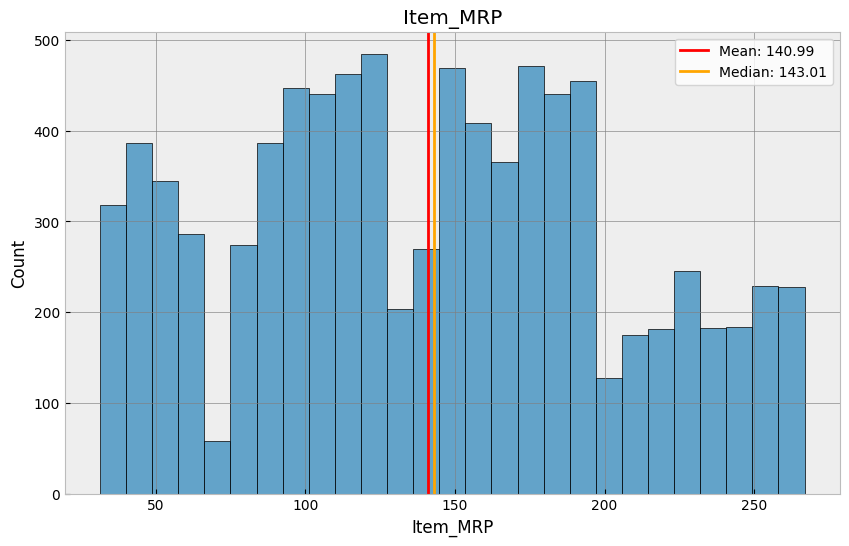

In [553]:
plot_annotated_histogram(df, 'Item_MRP');

**Interpretation**: The Mean and Median value are very close. This indicates that the data is not skewed.

In [554]:
## Create another function to plot with a different style: "seaborn-v0_8-pastel" 
def pastel_annotated_histogram(df, col):
    ## Saving the mean and median of the column
    mean = df[col].mean().round(2)
    median = df[col].median().round(2)
    ## Create a plot with style "seaborn-v0_8-pastel" 
    with plt.style.context('seaborn-v0_8-pastel'):
      ## Creating the Plot
      fig,ax = plt.subplots(figsize=(10,6))
      sns.histplot(data=df, x=col, ax=ax, edgecolor = 'black')
      ax.set_title(col)
      ax.grid(c = 'grey', 
         alpha = .9,
         linestyle = '-')
    ## Annotating measures of centrality
    ax.axvline(mean, color='magenta',label=f'Mean: {mean}', lw=2);
    ax.axvline(median, color = 'orange',  label = f'Median: {median}', lw=2)
    
    ax.legend();
    return fig, ax

##### **`Item_Outlet_Sales`**

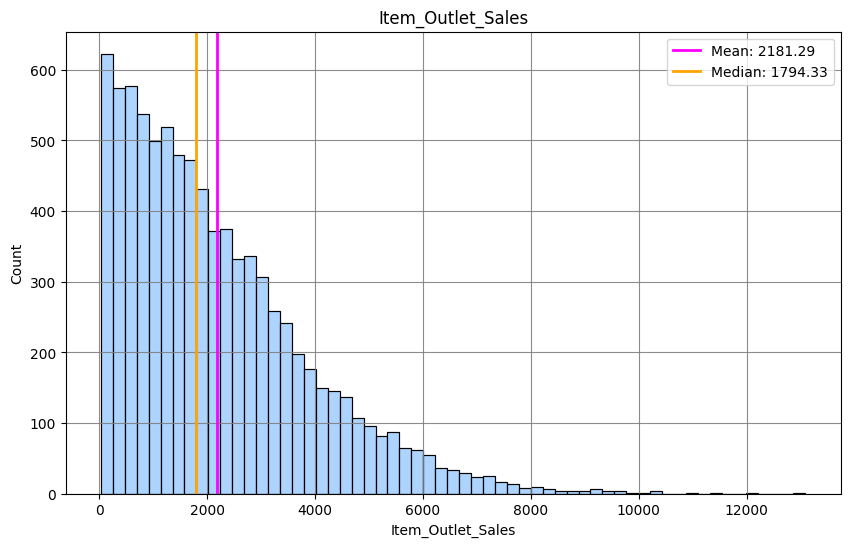

In [555]:
pastel_annotated_histogram(df, 'Item_Outlet_Sales');

**Interpretation**: The Median is less than the Mean, because the data is skewed to the high side.

### **Numerical Columns**

> #### **Regplot**

In [556]:
#Define a function for Regplot
def reg_plot(df, col1, col2):
  #Plot a regplot using col1, col2, df
  ax = sns.regplot(x=col1, y=col2, data= df, line_kws = {'color' : 'orange'}, marker=".", color = 'blue')
  #Add grey grid
  ax.grid(c = 'grey', 
         alpha = .9,
         linestyle = '-')
  #Set title
  ax.set_title(f'Relationship between {col1} and {col2}');

##### `Item_MRP` vs `Item_Outlet_Sales`

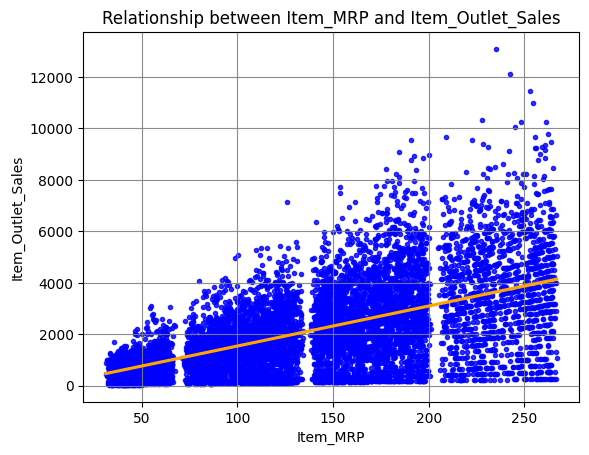

In [557]:
#Call the reg_plot function
reg_plot(df, 'Item_MRP', 'Item_Outlet_Sales')

**Interpretation**: There is a positive correlation between `Item_MRP` and `Item_Outlet_Sales`.

##### `Item_Weight` vs `Item_Outlet_Sales`

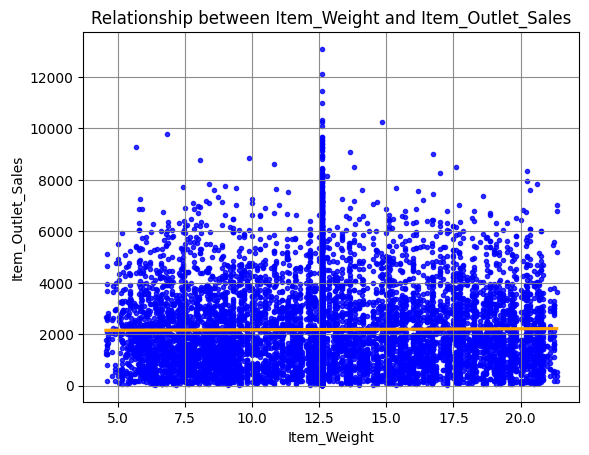

In [558]:
#Call the reg_plot function
reg_plot(df, 'Item_Weight', 'Item_Outlet_Sales')

**Interpretation**: There is no correlation between `Item_Weight` and `Item_Outlet_Sales`.

##### `Item_Visibility` vs `Item_Outlet_Sales`

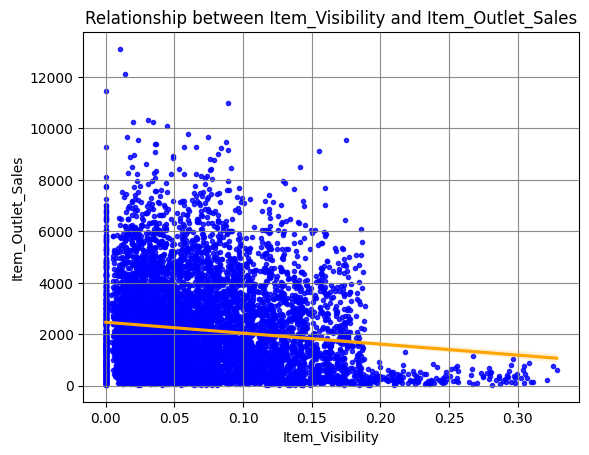

In [559]:
#Call the reg_plot function
reg_plot(df, 'Item_Visibility', 'Item_Outlet_Sales')

**Interpretation**: There is a negative correlation between `Item_Visibility` and `Item_Outlet_Sales`

##### `Outlet_Establishment_Year` vs `Item_Outlet_Sales`

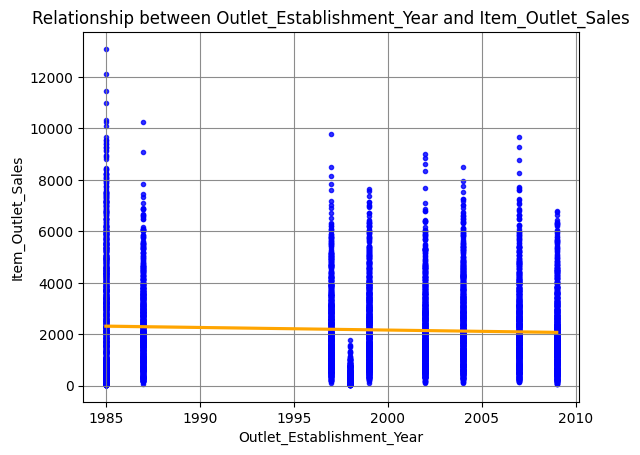

In [560]:
#Call the reg_plot function
reg_plot(df, 'Outlet_Establishment_Year', 'Item_Outlet_Sales')

**Interpretation**: There is no correlation between `Outlet_Establishment_Year` and `Item_Outlet_Sales`.

## Preprocesing for Machine Learning

### **Imports**

In [561]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

### **Reload in Data**

In [562]:
# Import fresh data again
path = '/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Project/sales_predictions.csv'
df2 = pd.read_csv(path)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **Inspect and Clean Data**

#### **Check for duplicates**

In [563]:
df2.duplicated().sum()

0

There are no duplicates.

#### **Fix inconsistencies in data**

In [ ]:
#Loop through categorical columns to check for inconsistant values).
dtypes = df2.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols
for col in str_cols:
    print(f"Column= {col}")
    print(df2[col].value_counts(dropna=False))
    print('\n\n')

In [565]:
df2.replace({'LF' : 'Low Fat', 
            'low fat' : 'Low Fat',
            'reg' : 'Regular'}, inplace=True)

In [566]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Inconsistent data has been addressed.**

#### **Drop columns with many unique values**

In [567]:
for col in str_cols:
    print(col)
    print(df2[col].nunique())

Item_Identifier
1559
Item_Fat_Content
2
Item_Type
16
Outlet_Identifier
10
Outlet_Size
3
Outlet_Location_Type
3
Outlet_Type
4


The column: `Item_Identifier` has many unique values. 

I will drop the `Item_Identifier` column due to high cardinality, because high cardinality will create a very sparse dataset when it is One Hot Encoded which can negatively impact the models' metrics and increase processing times.

In [568]:
#Drop Item_Identifier column

df2 = df2.drop(columns = 'Item_Identifier')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


### **Identify the features (X) and target (y)**

In [569]:
#Define features (X) and target(y)
X = df2.drop(columns = 'Item_Outlet_Sales')
y = df2['Item_Outlet_Sales']

### **Perform a train test split**

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### **Create a preprocessing object to prepare the dataset for Machine Learning**

#### **Identify each feature as numerical, ordinal, or nominal.**

In [571]:
#display datatype of each column in X
X.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [ ]:
#Display the values and counts of categorical column in X
dtypes = X.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols
for col in str_cols:
    print(f"Column= {col}")
    print(X[col].value_counts(dropna=False))
    print('\n\n')

* **Numerical**: `Item_Weight`, `Item_Visibility`, `Item_MRP`, `Outlet_Establishment_Year`
* **Ordinal**: `Item_Fat_Content`, `Outlet_Location_Type`, `Outlet_Size`
* **Nominal**: `Item_Type`, `Outlet_Type`, `Outlet_Identifier`

#### **Pipelines and Column Transformers**

#####1. Numerical Columns

In [573]:
# Use Transformers to impute missing values and to scale the numerical values
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Create a Pipeline
num_pipeline = make_pipeline(median_imputer, scaler)

# Column Selector
num_selector = make_column_selector(dtype_include='number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

##### 2. Ordinal Columns

Encode the following Ordinal Columns: `Item_Fat_Content`, `Outlet_Location_Type`, `Outlet_Size`

In [574]:
# Create a list for each ordinal column with the values sorted in order.
Item_Fat_Content_list = ['Low Fat', 'Regular']
Outlet_Location_Type_list = ['Tier 1', 'Tier 2', 'Tier 3']
Outlet_Size_list=['Small', 'Medium', 'High']

# Use transformers to impute missing values and to encode the ordinals
freq_imputer = SimpleImputer(strategy='most_frequent')
ord = OrdinalEncoder(categories=[Item_Fat_Content_list, Outlet_Location_Type_list, Outlet_Size_list])

# Use scaler to scale the ordinals
scaler2=StandardScaler()

# Create a pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)
# Column Selector
ordinal_cols = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size']
# Tuple
ordinal_tuple = (ord_pipeline, ordinal_cols)

##### 3. Nominal Columns

In [575]:
# Use transformers to impute missing values and to perform one-hot-encoding on the nominal columns
missing_imputer =SimpleImputer(strategy = 'constant', fill_value = 'Unknown')
ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
# Create a pipeline
nom_pipeline = make_pipeline(missing_imputer, ohe)
# Column Selector
nominal_cols = ['Item_Type', 'Outlet_Identifier', 'Outlet_Type']
# Tuple
nominal_tuple = (nom_pipeline, nominal_cols)

##### Create a Column Transformer using pipelines

In [576]:
##Instantiate a Column Transformer
preprocessor = make_column_transformer(numeric_tuple, ordinal_tuple, nominal_tuple, remainder='passthrough', verbose_feature_names_out= False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d081aaa70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Location_Type',
                                  'Outlet_Size']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Type'])],
                  verbose_feature_names_out=False)

#### Fit on Training data

In [577]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [578]:
# Fit on training data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d081aaa70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Location_Type',
                                  'Outlet_Size']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Type'])],
                  verbose_feature_names_out=False)

In [579]:
# Transform training data and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [580]:
#Display the resulting NumPy array output:
X_train_processed

array([[ 0.82748547, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [581]:
# Create dataframes from the processed arrays
# First get column names
cols = preprocessor.get_feature_names_out()

# Then transform numpy arrays to dataframes
X_train_processed_df = pd.DataFrame(X_train_processed, columns = cols, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns = cols, index=X_test.index)

In [582]:
# Display the first 10 rows of X_train_processed_df
X_train_processed_df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Location_Type,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,-0.740321,1.084948,0.287374,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,1.350766,1.084948,0.287374,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,1.350766,-1.384777,0.287374,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.740321,-0.149914,-1.384048,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-0.740321,-0.149914,0.287374,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4377,-0.049889,-0.114462,-0.508205,-1.532139,1.350766,-1.384777,-1.384048,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2280,1.894563,-0.074214,-0.859553,0.732018,1.350766,-0.149914,-1.384048,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8198,-0.049889,-0.047974,1.942997,-1.532139,1.350766,1.084948,0.287374,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7514,1.621865,1.851567,1.799954,0.732018,1.350766,-0.149914,-1.384048,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3463,-1.108667,-0.533682,-0.416764,0.732018,-0.740321,-0.149914,-1.384048,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Linear Regression Model**

In [583]:
#Import and instantiate the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [584]:
#Create a model pipeline
from sklearn.pipeline import make_pipeline
reg_pipe = make_pipeline(preprocessor, reg)

In [585]:
#Train the model on the training data
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d081aaa70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                  ['Item_Fat_Content',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Size']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [586]:
#Make predictions using training and test data
LR_train_prediction = reg_pipe.predict(X_train)
LR_test_prediction = reg_pipe.predict(X_test)

##### Evaluate the model using R2

In [587]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#Calculating R2
LR_train_r2 = r2_score(y_train, LR_train_prediction)
LR_test_r2 = r2_score(y_test, LR_test_prediction)

print(f'Model Training R2: {LR_train_r2}')
print(f'Model Testing R2: {LR_test_r2}')

Model Training R2: 0.5615592862875256
Model Testing R2: 0.5671489236609258


##### Evaluate the model using RMSE (Root Mean Squared Error)

In [588]:
# Calculate MSE
LR_train_MSE = mean_squared_error(y_train, LR_train_prediction)
LR_test_MSE = mean_squared_error(y_test, LR_test_prediction)
# Use MSE to calculate RMSE
LR_train_RMSE = np.sqrt(LR_train_MSE)
LR_test_RMSE = np.sqrt(LR_test_MSE)
print(f'Model Training RMSE: {LR_train_RMSE}')
print(f'Model Testing RMSE: {LR_test_RMSE}')

Model Training RMSE: 1139.0987100743632
Model Testing RMSE: 1092.8066108063997


**Analysis**: R2 score (0.57) is quite low  and RMSE is very high. 

This is not a good model to be used for prediction.

## **Regression Tree Model**

In [589]:
# Import and instantiate the model
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [590]:
#Create a model pipeline
from sklearn.pipeline import make_pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

In [591]:
# Fit the model on the training data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d081aaa70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                   'Outlet_Location_Type',
                                                   'Outlet_Size']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [592]:
#Make predictions using training and test data
DT_train_prediction = dec_tree_pipe.predict(X_train)
DT_test_prediction = dec_tree_pipe.predict(X_test)

##### Evaluate the model using R2

In [593]:
#Calculating R2
DT_train_r2 = r2_score(y_train, DT_train_prediction)
DT_test_r2 = r2_score(y_test, DT_test_prediction)

print(f'Model Training R2: {DT_train_r2}')
print(f'Model Testing R2: {DT_test_r2}')

Model Training R2: 1.0
Model Testing R2: 0.18776888402378522


##### Evaluate the model using RMSE (Root Mean Squared Error)

In [594]:
# Calculate MSE
DT_train_MSE = mean_squared_error(y_train, DT_train_prediction)
DT_test_MSE = mean_squared_error(y_test, DT_test_prediction)
# Use MSE to calculate RMSE
DT_train_RMSE = np.sqrt(DT_train_MSE)
DT_test_RMSE = np.sqrt(DT_test_MSE)
print(f'Model Training RMSE: {DT_train_RMSE}')
print(f'Model Testing RMSE: {DT_test_RMSE}')

Model Training RMSE: 4.925864104892086e-15
Model Testing RMSE: 1496.9726789184328


### Tune the model

In [595]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [596]:
# depth of default tree
dec_tree.get_depth()

40

#### Finding the Optimal max_depth (hyperparameter tuning)

In [597]:
# List of values to try for max_depth:
depths = list(range(2, 40)) # try every value between 2 and 40
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_score = dec_tree_pipe.score(X_train, y_train)
    test_score = dec_tree_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

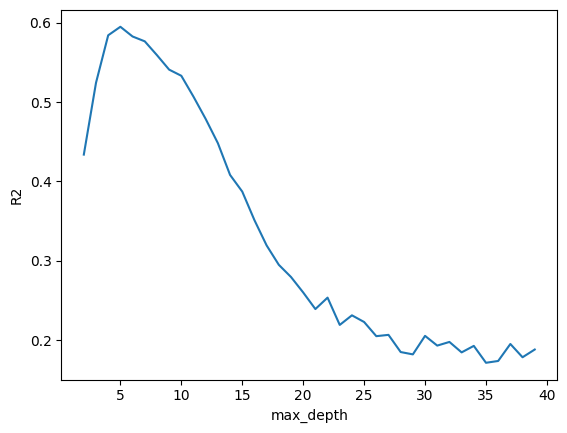

In [598]:
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [599]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.594709,0.603933
4,0.584005,0.582625
6,0.582485,0.615153
7,0.576397,0.626842
8,0.559016,0.64384


In [600]:
# Run the model with optimized value for max_depth
dec_tree_opt = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_pipe_opt = make_pipeline(preprocessor, dec_tree_opt)
dec_tree_pipe_opt.fit(X_train, y_train)
train_opt_score = dec_tree_pipe_opt.score(X_train, y_train)
test_opt_score = dec_tree_pipe_opt.score(X_test, y_test)
print(train_opt_score)
print(test_opt_score)


0.6039332360864909
0.5947092601209933


In [601]:
#Make predictions using training and test data
DT_opt_train_prediction = dec_tree_pipe_opt.predict(X_train)
DT_opt_test_prediction = dec_tree_pipe_opt.predict(X_test)

In [602]:
## Create a function to calculate the MAE, MSE, RMSE, and R2 metrics for a model
def eval_regression(y_true, y_pred, name='model'):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

## **Bagged Tree Model**

In [603]:
## Import the model
from sklearn.ensemble import BaggingRegressor

In [604]:
# Create an instance of the model
bag_reg = BaggingRegressor()

# Create a model pipeline
bag_reg_pipe = make_pipeline(preprocessor, bag_reg)

# Fit the model
bag_reg_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d081aaa70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                  ['Item_Fat_Content',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Size']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor())])

###Finding the optimal parameters

In [605]:
# List of estimator values
estimators = [10, 20, 30, 40, 50, 100, 200, 300]
# Data frame to store the scores
scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
# Iterate through the values to find the best number of estimators
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg_pipe = make_pipeline(preprocessor, bag_reg)
   bag_reg_pipe.fit(X_train, y_train)
   train_score = bag_reg_pipe.score(X_train, y_train)
   test_score = bag_reg_pipe.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score

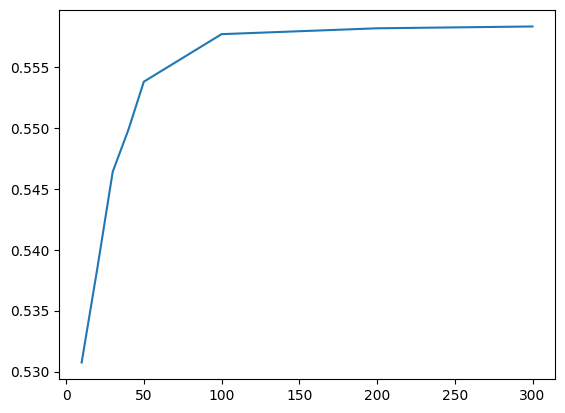

In [606]:
# Plot the scores
plt.plot(scores['Test Score'])
plt.show()

In [607]:
# Sort by test score
scores = scores.sort_values(by='Test Score', ascending=False)
scores

,Train Score,Test Score
300,0.939991,0.558324
200,0.93945,0.558174
100,0.938291,0.557693
50,0.935421,0.553793
40,0.933645,0.549819
30,0.931711,0.546406
20,0.927798,0.538404
10,0.919411,0.530744


In [608]:
# Save the index value of the best test score.
best_n_estimators = scores.index[0]
# Instantiate and fit the best version of the model
bag_reg_tuned = BaggingRegressor(n_estimators=best_n_estimators,random_state=42)
bag_reg_tuned_pipe = make_pipeline(preprocessor, bag_reg)
bag_reg_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d081aaa70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                   'Outlet_Location_Type',
                                                   'Outlet_Size']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=300, random_state=42))])

### Evaluate the model

In [609]:
## Make predictions using the model
BT_train_pred = bag_reg_tuned_pipe.predict(X_train)
BT_test_pred = bag_reg_tuned_pipe.predict(X_test)
## Display model performance metrics using a function

eval_regression(y_train, BT_train_pred, name = 'Bagged Tree Regression Train')
eval_regression(y_test, BT_test_pred, name = 'Bagged Tree Regression Test')

Bagged Tree Regression Train Scores
MAE: 294.5285 
MSE: 177,595.2967 
RMSE: 421.4206 
R2: 0.9400

Bagged Tree Regression Test Scores
MAE: 768.9131 
MSE: 1,218,575.1295 
RMSE: 1,103.8909 
R2: 0.5583



## **Random Forest Model**

In [610]:
## Import the model
from sklearn.ensemble import RandomForestRegressor

In [611]:
## Create an instance of the model
randomforest = RandomForestRegressor()
## Create a model pipeline
randomforest_pipe = make_pipeline(preprocessor, randomforest)

## Fit the model
randomforest_pipe.fit (X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d081aaa70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                   'Outlet_Location_Type',
                                                   'Outlet_Size']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor', RandomForestRegressor())])

### Random Forest Tuning

#### Find the optimal depth

In [612]:
est_depths = [estimator.get_depth() for estimator in randomforest.estimators_]
max(est_depths)

47

In [613]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth, random_state=42)
   model_pipe = make_pipeline (preprocessor, model)
   model_pipe.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model_pipe.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model_pipe.score(X_test, y_test)
   scores.head()

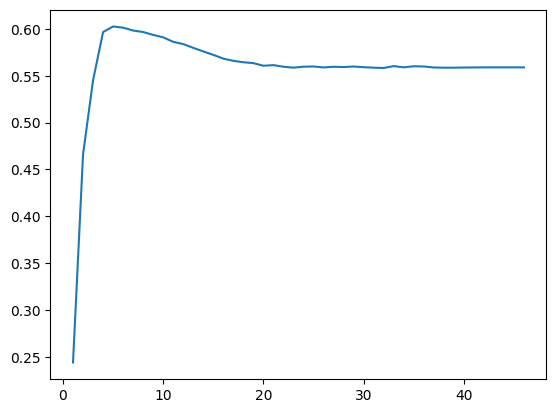

In [614]:
plt.plot(scores['Test Score'])

In [615]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.602602,0.610538
6,0.601306,0.624532
7,0.598271,0.643166
8,0.596665,0.666314
4,0.596634,0.595925


#### Tune n_estimators

In [616]:
# choose a couple of values for n_estimators to save time
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=5, n_estimators=n, random_state=42)
   model_pipe = make_pipeline (preprocessor, model)
   model_pipe.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model_pipe.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model_pipe.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.601001,0.610677
100,0.602602,0.610538
150,0.602973,0.610366
200,0.602878,0.61038
250,0.60293,0.610486


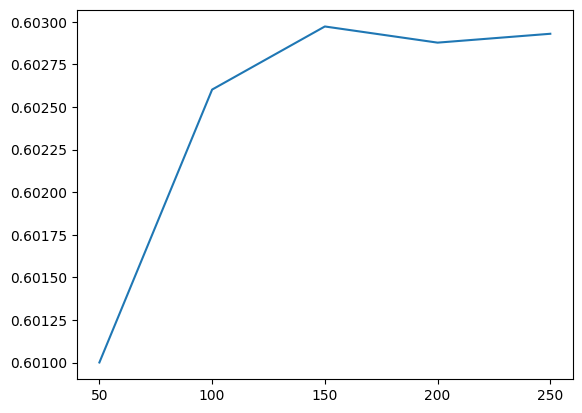

In [617]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [618]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
150,0.602973,0.610366
250,0.60293,0.610486
200,0.602878,0.61038
100,0.602602,0.610538
50,0.601001,0.610677


#### Random Forest Optimized Model

In [619]:
optimized_model = RandomForestRegressor(max_depth=5, n_estimators=150, random_state=42)

optimized_model_pipe = make_pipeline (preprocessor, optimized_model)

optimized_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d081aaa70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, n_estimators=150,
                                       random_state=42))])

In [620]:
## Make predictions using the model
RF_train_pred = optimized_model_pipe.predict(X_train)
RF_test_pred = optimized_model_pipe.predict(X_test)
## Display model performance metrics using a function

eval_regression(y_train, RF_train_pred, name = 'Random Forest Regression Train')
eval_regression(y_test, RF_test_pred, name = 'Random Forest Regression Test')


Random Forest Regression Train Scores
MAE: 755.4877 
MSE: 1,153,105.5776 
RMSE: 1,073.8275 
R2: 0.6104

Random Forest Regression Test Scores
MAE: 728.2810 
MSE: 1,095,389.4613 
RMSE: 1,046.6086 
R2: 0.6030



## **Comparing Models**

In [621]:
## Create a function to take the true and predicted values
## and calculate MAE, MSE, RMSE, and R2 metrics in dataframe
def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model'):
  
  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[f'{model_name}'])
  scores.loc[f'{model_name}', :] = [train_mae, test_mae,
                                          train_rmse, test_rmse,
                                          train_r2, test_r2]

  return scores

In [622]:
# Evaluate all the models
eval_regression(y_test, LR_test_prediction, name = 'Linear Regression Test')
eval_regression(y_test, DT_opt_test_prediction, name = 'Decision Tree Regression Test')
eval_regression(y_test, BT_test_pred, name = 'Bagged Tree Regression Test')
eval_regression(y_test, RF_test_pred, name = 'Random Forest Regression Test')

Linear Regression Test Scores
MAE: 804.0838 
MSE: 1,194,226.2886 
RMSE: 1,092.8066 
R2: 0.5671

Decision Tree Regression Test Scores
MAE: 738.3556 
MSE: 1,118,187.9463 
RMSE: 1,057.4441 
R2: 0.5947

Bagged Tree Regression Test Scores
MAE: 768.9131 
MSE: 1,218,575.1295 
RMSE: 1,103.8909 
R2: 0.5583

Random Forest Regression Test Scores
MAE: 728.2810 
MSE: 1,095,389.4613 
RMSE: 1,046.6086 
R2: 0.6030



In [623]:
# Linear Regression
scores_df = model_metrics(reg_pipe, X_train, y_train, 
                            X_test, y_test, 
                            model_name='Linear Regression Model')

In [624]:
# Decision Tree Optimized
DT_opt = model_metrics(dec_tree_pipe_opt, X_train, y_train, 
                            X_test, y_test, 
                            model_name='Decision Tree Optimized Model')

In [625]:
#Bagged Tree Optimized
BT_opt = model_metrics(bag_reg_tuned_pipe, X_train, y_train, 
                            X_test, y_test, 
                            model_name='Bagged Tree Optimized Model')

In [626]:
# Random Forest Optimized
RF_opt = model_metrics(optimized_model_pipe, X_train, y_train, 
                            X_test, y_test, 
                            model_name='Random Forest Optimized Model')

In [627]:
scores_df = pd.concat([scores_df, DT_opt, BT_opt, RF_opt])

In [628]:
#Sort by test_RMSE to find the best model
scores_df.sort_values(by='test_RMSE')

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Random Forest Optimized Model,755.4877,728.281,1073.8275,1046.6086,0.6104,0.603
Decision Tree Optimized Model,762.6399,738.3556,1082.6551,1057.4441,0.6039,0.5947
Linear Regression Model,847.1333,804.0838,1139.0987,1092.8066,0.5616,0.5671
Bagged Tree Optimized Model,294.5285,768.9131,421.4206,1103.8909,0.94,0.5583


In [629]:
df2['Item_Outlet_Sales'].mean()

2181.288913575032

## **Analysis and Recommendation**

Between `Decision Tree Model` and `Linear Regression Model`, Decision Tree Model yields better metrics with a lower MAE and RMSE and a higher R2 score on the test data.

Based on the overall metrics of all 4 models, the `Optimized Random Forest Tree Model` (max_depth=5, n_estimators=150) has the lowest MAE of **728** and RMSE of **1047** on the test data. The difference between RMSE and MAE implies that the model is making some larger errors as well.

Since the average value of `Item_Outlet_Sales` column is **2181** and the Mean Average Error on the Test data is about **728** for the optimized Random Forest model, the model is off by about **33.4 %** on average.

## **Limitation**

`Optimized Random Forest Model`, `Optimized Decision Tree Model`, and `Linear Regression Model` are all underfit and have high bias. This can be explained from the observation that the features do not correlate well with the target as we observed with the Heatmaps, and that some values were imputed.

`Optimized Bagged Tree Model` shows overfit characteristics (high variance) because the R2 score on the train data is high while the R2 score on the test data is not high.

For this set of data, even the best model (Optimized Random Forest Model) is underfit. 